In [1]:
import os
import sys
import pandas as pd

In [2]:
partition = input("Inserisci la partizione che vuoi utilizzare")
print("Hai inserito la partizione: ", partition)
partition = os.path.join("../partitioning/npy", partition)

foldername = input("Inserisci il nome della cartella dove salvare i risultati")
print("Hai inserito la cartella: ", foldername)

Hai inserito la partizione:  p_200_10
Hai inserito la cartella:  xgb_p_200_10


In [3]:
import tensorflow as tf
print("GPU disponibile:", tf.config.list_physical_devices('GPU'))

2025-03-11 20:54:47.380738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-X.Y/lib64
2025-03-11 20:54:47.380757: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


GPU disponibile: []


2025-03-11 20:54:51.317821: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-11 20:54:51.317858: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (paolo-Katana-15-B13VFK): /proc/driver/nvidia/version does not exist


In [4]:
sys.path.append("../models")

In [5]:
from xgboost_model import XGBoostModel

In [6]:
def load_partitions(root_path):
    file_names = ["X_train.csv", "X_test.csv", "X_val.csv", "y_train.csv", "y_test.csv", "y_val.csv"]
    datasets = [pd.read_csv(os.path.join(root_path, file)).values for file in file_names]
    return tuple(datasets)

In [7]:
# load data
X_train, X_test, X_val, y_train, y_test, y_val = load_partitions(partition)

# show partitions dimention
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (1791, 200), y_train shape: (1791, 1)
X_test shape: (384, 200), y_test shape: (384, 1)
X_val shape: (383, 200), y_val shape: (383, 1)


In [8]:
# initialize model
xgboost_model = XGBoostModel(foldername)

Parametri del modello salvati in ./tests/xgb_p_200_10/model_params.json


[0]	validation_0-rmse:0.12364	validation_1-rmse:0.11800
[1]	validation_0-rmse:0.11677	validation_1-rmse:0.11283
[2]	validation_0-rmse:0.11075	validation_1-rmse:0.10867
[3]	validation_0-rmse:0.10534	validation_1-rmse:0.10469
[4]	validation_0-rmse:0.10067	validation_1-rmse:0.10175
[5]	validation_0-rmse:0.09658	validation_1-rmse:0.09909
[6]	validation_0-rmse:0.09474	validation_1-rmse:0.09877
[7]	validation_0-rmse:0.09121	validation_1-rmse:0.09707
[8]	validation_0-rmse:0.08794	validation_1-rmse:0.09552
[9]	validation_0-rmse:0.08504	validation_1-rmse:0.09423
[10]	validation_0-rmse:0.08252	validation_1-rmse:0.09282
[11]	validation_0-rmse:0.08138	validation_1-rmse:0.09275
[12]	validation_0-rmse:0.07926	validation_1-rmse:0.09176
[13]	validation_0-rmse:0.07843	validation_1-rmse:0.09158
[14]	validation_0-rmse:0.07658	validation_1-rmse:0.09084
[15]	validation_0-rmse:0.07468	validation_1-rmse:0.08991
[16]	validation_0-rmse:0.07288	validation_1-rmse:0.08965
[17]	validation_0-rmse:0.07159	validation

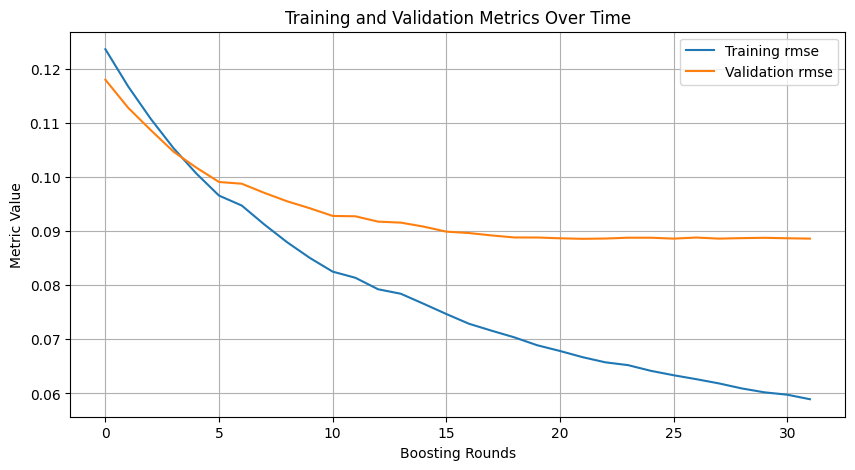

Grafico delle metriche di training salvato.


In [9]:
# training
xgboost_model.train(X_train, y_train, X_val, y_val)

In [10]:
xgboost_model.evaluate(X_test, y_test)

Metriche salvate in ./tests/xgb_p_200_10/evaluation_metrics.csv


{'MSE': 0.006835132783940244,
 'RMSE': 0.08267486186223866,
 'MAE': 0.0645903676914765,
 'R2': 0.5017358229257003}

In [11]:
xgboost_model.save_model()

Modello salvato in ./tests/xgb_p_200_10/xgboost_model.json


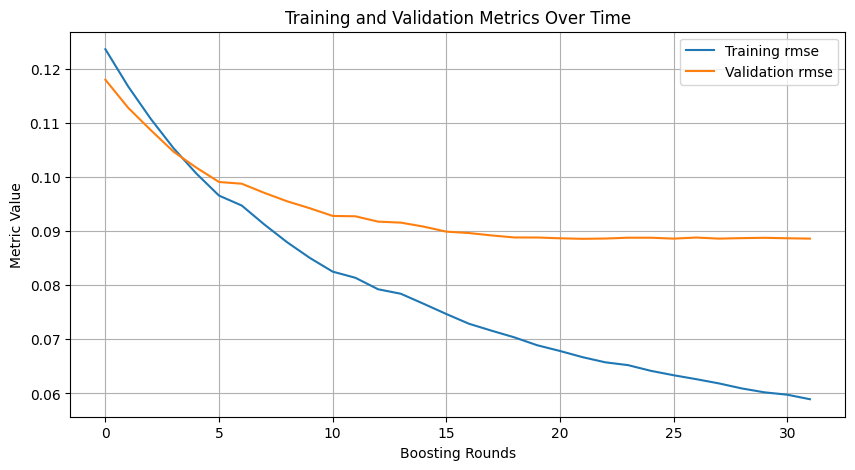

Grafico delle metriche di training salvato.


In [12]:
xgboost_model.plot_training_metrics()

In [13]:
y_pred = xgboost_model.predict(X_test)

In [14]:
xgboost_model.compare_predictions(y_test, y_pred)

Confronto predizioni salvato in ./tests/xgb_p_200_10/predictions_comparison.csv


,Valore Reale,Predizione
0,-0.048412,-0.153654
1,0.026048,0.075431
2,-0.010717,-0.152250
3,-0.043663,-0.049169
4,0.069371,0.009908
...,...,...
379,0.034732,0.062705
380,0.148835,-0.005031
381,0.009930,0.027147
382,0.009931,0.001408


In [15]:
xgboost_model.plot_predictions(y_test, y_pred, 50)

Grafico salvato in ./tests/xgb_p_200_10/predictions_plot_1.png
Grafico salvato in ./tests/xgb_p_200_10/predictions_plot_2.png
Grafico salvato in ./tests/xgb_p_200_10/predictions_plot_tot.png
